# Character-level Convolutional Network
In this notebook we train and evaluate the performance of a convolutional neural network in the task of detecting misinformation in WhatsApp texts.

In [89]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE 
%matplotlib inline
sns.set(style="whitegrid")

In [90]:
base = 2018
filepath = 'data/' + str(base) + '/fakeWhatsApp.BR_' + str(base) + '.csv'
df = pd.read_csv(filepath)
df.head(5)

/home/cabral/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,date,hour,ddi,country,country_iso3,ddd,state,group,midia,url,characters,words,viral,sharings,text,misinformation
0,3631133147603888180,01/08/18,13:13,55,BRASIL,BRA,17,São Paulo,2018_1,1,0,25,4,0,1,<Arquivo de mídia oculto>,0
1,3631133147603888180,01/08/18,13:24,55,BRASIL,BRA,17,São Paulo,2018_1,0,0,58,9,1,2,O Bolsonaro tem que estar preparado pra respon...,0
2,3631133147603888180,01/08/18,13:24,55,BRASIL,BRA,17,São Paulo,2018_1,1,0,25,4,0,1,<Arquivo de mídia oculto>,0
3,-4391661641377612003,01/08/18,13:28,55,BRASIL,BRA,13,São Paulo,2018_1,0,0,5,1,0,1,Boaaa,0
4,-4391661641377612003,09/08/18,14:46,55,BRASIL,BRA,13,São Paulo,2018_1,1,0,25,4,0,1,<Arquivo de mídia oculto>,0


In [91]:
#removing duplicates
df = df.drop_duplicates(subset=['text'])
#texts
texts = df[df['midia']==0]['text']
#target
y = df[df['midia']==0]['misinformation']

# Char vocabulary, encoding and decoding

In [92]:
txt_list = list(texts)
txt_str = " ".join(txt_list)
#word_list = msg_str.split()
char_list = list(txt_str)
vocab_set = set(char_list)
features = len(vocab_set)
print(features)

1304


In [93]:
for v in list(vocab_set):
    print(v, end = ' ')

⠒ 🅱 🕴 н 😆 🍚 🃏 ໊ 😫 🔞 🤰 実 💮 📏 ル 😱 ⣙ じ 😠 ┗ 🚍 分 🇪 🐇 🗞 🐴 ] 🧚 喜  ⠁ 🚀 🚢 T 🖖 🐓 と ・ ✓ 🗣 🗻 💽 📚 ☆ ま ⢠ ⚫ 🆘 式 🔨 👴 🅰 🍬 ້ 🥁 ー ◇ ❄ 7 🐺 💅 🍳 🍌 📰 z り 🤕 l ☹ 🍞 の 😌 🔬 💢 💠 ৣ 🗯 ⛪ 】 🎫 〽 🇱 ↪ ঔ 🏀 🌪 ═  🤛 > 😁 ⭐ 💉 6 🏩 % た 💡 🤺 🌛 🚖 🌝 🔝 ✋ א 🤒 🇳 \ ┏ 🦇 ט 😥 „ 🐠 介  午 🍤 ⣼ а χ 🐎 á 🌻 😣 🐛 ­ 🍵 わ 何 🤧 D 🍆 🛵 🛎 ツ ο 🛐 ┻ ⠉ 👢 【 🍏 ά 🕔 正 ë ♠ 🚲 ⚓ 😘 ¬ Ã 🤵 🆙 ⏹ 持 🖐 ⣉ 📩 🌟 😋 ⚔ 💷 💺 🤮 ┃ 📉 😽 ☝ ɴ 🇫 h ‿ 🐸 🚑 ☺ 🇾 ♀ 👦 示 😬 🤐 _ 🌜 ⤴ 🗓 ☃ 卐 🏼 🥑 🚗 Í 👽 ⡟ 👙 💕 🎤 👐 📺 C 🍷 場 ່ 🌱 ➖ 🇴 🎊 🤳 🔹 » 🆖 ב 🏋 ģ 👻 🏴 Ä U ∴ で 🐱 k 🌽 � 😜 🛸 ” 🐗 ◤ 🤗 🌨 🍎 🤱 ► 🤹 🚮 L B 🚬 Ă ¤ 💲 ė 😉 🦅 ヘ 🎁 😙 🤯 🐽 . 🚛 🎵 ⣆ 📱 🏳 🦋 👹 一 ¡ 🚤 🎥 # λ 🍛 υ 😐 ヽ 📦 💝 👸 😲 ⚽ * 🚦 φ Ɨ ❎ 😵 🍦 ◥ ╭ ☞ 💰 👆 s 🥘 È ⣦ 😧 🍾 ⛴ 🚉 Ƭ お 🔟 😇 Z + 🕑 ̈ 💵 ⡛ 🥛 第 ➤ 📜 🏨 😻 幺 🍯 🎖 🎋 🔺 👉 📖 ⃣ ⠿ ɨ 😗 ◀ 📗 🙇 👰 を 🙌 ☕ 🔮 🙃 🌴 🐦 ι τ 😝 🍄 ⎠ g 👊 ■ G — ➜ т ⠙ 🎩 ή 🖍 M 😼 🌞 🛏 ╱ 🆗 📆 😅 🛩 ) ⁩ ⠟ ┣ d 🤔 ̲ 🧔 🐖 9 ĺ 🍼 🧡 🏞 : 🥚 🎙 🍒 🗑 😶 ┛ ✏ 💃 🐀 🌕 🎨 🔕 📵 c 🤫 🐌 🏹 🔋 ╰ 👵 ⡋ ▪ ⠀ 🔈 ─ 🌭 る ❌ 
 🔔 🙆 🕵 🇰 👼 η ⠢ ✍ 👮 🚡 ̷ j 💬 ê 🏥 🚜 ┳ 💣 ✌ ⣸ 🦀 👿 × 📝 🔩 e   💓 🎾 ⣾ 🎅 📢 ⚠ 🧐 ✿ 🇺 🛴 ⏬ ύ 🇷 っ ⠋ Ô 🧜 📷 H 🐢 定 💒 ⣭ 👠 ໋ 🤼 à ⣤ 🚒 🛇 💥 ケ 📛 🤚 ⚒ 	 👨 ポ ♥ ⚰ 🍰 警 Ç 👘 💘 🚈 😎 😯 🙊 📐 🇼 · 👀 ☄ 🇵 🎻 ╯ 🧟 ☻ 📙 ⎝ ⏩ 🔴 ÷ « ^ ✨ ï 📴 💛 🌧 Å 

In [94]:
#dictionaries to encode char to indexes and indexes to char
char2Code = {}
code2Char = {0: ''}

i=1
for char in list(vocab_set):
    char2Code[char] = i
    code2Char[i] = char
    i+=1

In [95]:
#enconding and decoding fu
def vectorize(text, char2Code = char2Code):
    '''
    Enconding function: converts an string in code
    Input: string
    Output: coded string
    '''
    #text = text.lower()
    text_list = list(text)
    text_vector = []
    for token in text_list:
        if token in char2Code:
            code = char2Code[token]
            text_vector.append(code)
        else:
            text_vector.append(0)
    return(text_vector)

def unvectorize(vec, code2Char = code2Char):
    '''
    Decoding function: converts code in string
    Input: coded index list
    Output: string
    '''
    text = ''
    for i in vec:
        text += code2Char[i]
    return text
        
v = vectorize('This is a test!!! Gotcha? 🌝')
w = unvectorize(v)
print(v)
print(w)

[34, 173, 1251, 287, 952, 1251, 287, 952, 951, 952, 1181, 427, 287, 1181, 1235, 1235, 1235, 952, 341, 617, 1181, 386, 173, 951, 576, 952, 102]
This is a test!!! Gotcha? 🌝


In [ ]:
df['vec'] = [vectorize(x) for x in df['text']]
X = df['vec'].to_numpy()

In [83]:
X.shape

(114445,)

# Distribuition of chars in documents

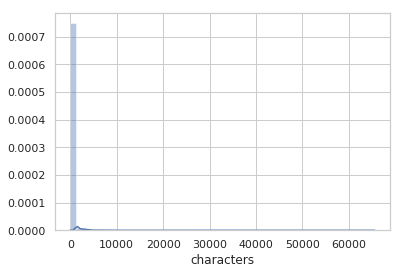

In [25]:
sns.distplot(df['characters'])

In [27]:
df['characters'].describe()

count    114445.000000
mean        135.869675
std         515.457870
min           1.000000
25%          21.000000
50%          40.000000
75%          94.000000
max       65536.000000
Name: characters, dtype: float64

# Train-test split and oversampling

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [114445, 114444]

In [88]:
X_train.shape

(80110,)

In [79]:
X_train

array([array([ 911,  386,  951, 1303,  617,  942,  942,  942,  942,  942]),
       array([ 911, 1160,  952,  427,  942,  952,  566,  617,  942,  952,  494,
        951,  790,  362,  951,  788,  952,  427,   68,  427,  952, 1251,
        788,  952,  951,  952,  494,  427,  788,  362,  951]),
       array([1302,  617,  287,  287,  617,  952, 1001,  942, 1181,  942,  788,
        617,  952, 1229,  788,  427,  287, 1251,  362,  427,  790, 1181,
        427,  952, 1251,  790,  362,  617,  952,  566,  617, 1181,  951,
        788,  952,  339, 1223,  500,  841]),
       ...,
       array([1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237,
       1237, 1237, 1237, 1237, 1237]),
       array([ 201,  617,   68,  617,  386,  951,  952,  790,  951,  952,  915,
        427,  386,  617,  788,  362,  952,  617,  942,  952,  719,  617,
        566,  427,  494,  952,  810,  951,  790,  952,  790,  617,  952,
        994,  617,  942,   34,  942, 1303,  427]),
       array([ 810,  427,  28

# Balancing

In [ ]:
#oversampling with SMOTE
#sm = SMOTE(random_state=42)
#X_train, y_train = sm.fit_resample(X_train, y_train)
#X_train.shape

In [68]:
#UNDERSAMPLING
y_train = np.array(y_train)

#separate classes
pos_mask = y_train == 1 
y_pos = y_train[pos_mask]
X_pos = X_train[pos_mask]

neg_mask = y_train == 0 
y_neg = y_train[neg_mask]
X_neg = X_train[neg_mask]

#selects a random sample of negative patterns to match the negative class (most abundant)
np.random.seed(42)

idx = np.random.randint(y_neg.shape[0], size = y_pos.shape[0])
y_sampled = y_neg[idx]
X_sampled = X_neg[idx]
#concatena a amostra de padrões negativos com os padrões positivos
y_train = np.concatenate((y_pos,y_sampled),axis=0)
X_train = np.concatenate((X_pos,X_sampled),axis=0)

#shuffle
indices = np.random.permutation(X_train.shape[0])
X_train = X_train[indices]
y_train = y_train[indices]

print('balanced data:', y_train.shape)

balanced data:  (4614,)


# Build model

In [72]:
#hyperparameters:
max_features = features #726 #196921 #corrigir
maxlen = 1000
batch_size = 32
embedding_dims = 100
filters = 250
kernel_size = 15
hidden_dims = 250
epochs = 2

In [73]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions

#variar
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Build model...


In [74]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs)#,
          #validation_data=(X_test, y_test))

ValueError: Error when checking input: expected embedding_3_input to have shape (1000,) but got array with shape (1,)

In [ ]:
y_prob = model.predict(X_test)
y_pred = [0 if x < 0.5 else 1 for x in y_prob]